<a href="https://colab.research.google.com/github/sanaahmad4222/python/blob/main/CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,730 (495.04 KB)

 Trainable params: 126,730 (495.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 36ms/step - accuracy: 0.3455 - loss: 1.7484 - val_accuracy: 0.5032 - val_loss: 1.4121
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.5732 - loss: 1.1925 - val_accuracy: 0.6394 - val_loss: 1.0232
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.6541 - loss: 0.9865 - val_accuracy: 0.6524 - val_loss: 1.0170
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.6952 - loss: 0.8723 - val_accuracy: 0.6740 - val_loss: 0.9505
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7278 - loss: 0.7888 - val_accuracy: 0.6878 - val_loss: 0.9160
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7518 - loss: 0.7121 - val_accuracy: 0.7217 - val_loss: 0.8206
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7679 - loss: 0.6610 - val_accuracy: 0.6973 - val_loss: 0.8877
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.7858 -

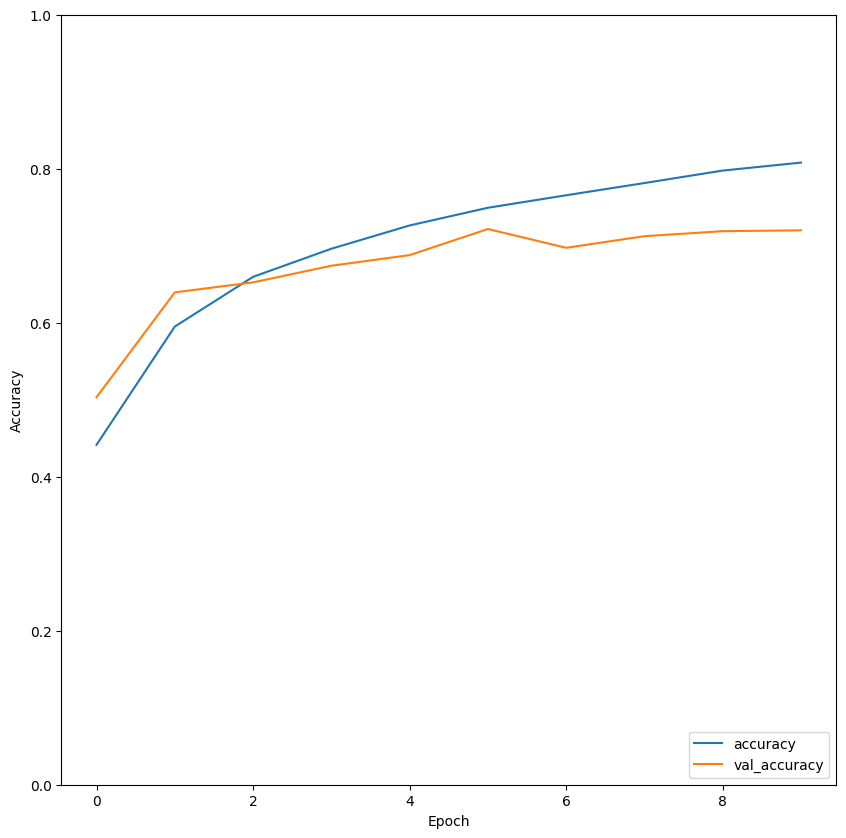

In [ ]:
# Import required libraries
#!pip install tensorflow

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize the images to a pixel range of 0 to 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Display a few images from the training dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
#for i in range(16):
    #plt.subplot(4, 4, i+1)
    #plt.xticks([])
    #plt.yticks([])
    #plt.grid(False)
    #plt.imshow(train_images[i], cmap=plt.cm.binary)
    #plt.xlabel(class_names[train_labels[i][0]])
#plt.show()

# Build the CNN model
model = models.Sequential()

# 1st Convolution layer: with 64 filters, 3x3 kernel size, 'relu' activation, input shape defined for 32x32x3 images
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Pooling layer: with 2x2 pool size to reduce the spatial dimensions
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Convolution layer: 64 filters with 3x3 kernel size, followed by another pooling layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Convolution layer: 64 filters with 3x3 kernel size, followed by another pooling layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the feature maps into a 1D vector for input into the Dense layer
model.add(layers.Flatten())

# Fully connected Dense layer with 64 neurons and 'relu' activation function
model.add(layers.Dense(64, activation='relu'))

# Output layer with 10 neurons (one for each class in CIFAR-10) using 'softmax' for multi-class classification
model.add(layers.Dense(10, activation='softmax'))

# Summary of the model architecture
model.summary()

# Compile the model: specify optimizer, loss function, and evaluation metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model: with 5 epochs and validation data as test set
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Plot the accuracy and loss trends over training epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
#plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')
